# Лабораторная работа №3 Регрессионный анализ без пакета SPSS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#импортируем данные
df = pd.read_excel('data.xlsx')
df.head()

,Номер периода,Продажи от основных фирм,Общие продажи cумма,Продажи от основных товаров,Себестоимость,Число покупателей
0,1,0.0,155326.30,24310.6,138394.86,4
1,2,0.0,1237184.99,482378.4,1068232.83,23
2,3,30700.0,1333837.00,103833.6,1131189.10,15
3,4,100723.5,2400539.43,1123962.4,2077715.64,29
4,5,274419.4,2791297.32,772457.4,2432157.64,39


## Разведывательный анализ   
Как всегда начинаем изучение нового набора данных с разглядывания графиков. Визуализируем матрицу корреляций и ввиде тепловой карты:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Номер периода                36 non-null     int64  
 1   Продажи от основных фирм     36 non-null     float64
 2   Общие продажи cумма          36 non-null     float64
 3   Продажи от основных товаров  36 non-null     float64
 4   Себестоимость                36 non-null     float64
 5   Число покупателей            36 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.8 KB


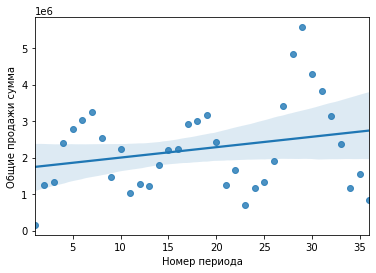

In [3]:
x = df['Номер периода']
y = df['Общие продажи cумма']
sns.regplot(x=x, y=y)
None

In [4]:
df.describe()

,Номер периода,Продажи от основных фирм,Общие продажи cумма,Продажи от основных товаров,Себестоимость,Число покупателей
count,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000
mean,18.500000,6.660305e+05,2.243515e+06,9.587092e+05,2.089140e+06,27.083333
std,10.535654,5.797452e+05,1.203365e+06,7.613188e+05,1.164625e+06,8.590277
min,1.000000,0.000000e+00,1.553263e+05,2.431060e+04,1.383949e+05,4.000000
25%,9.750000,2.893972e+05,1.264136e+06,5.178485e+05,1.124462e+06,21.750000
50%,18.500000,5.398622e+05,2.224616e+06,7.630197e+05,1.950334e+06,28.000000
75%,27.250000,7.230896e+05,3.007902e+06,9.952228e+05,2.659485e+06,34.000000
max,36.000000,2.606174e+06,5.573645e+06,3.565238e+06,5.088851e+06,43.000000


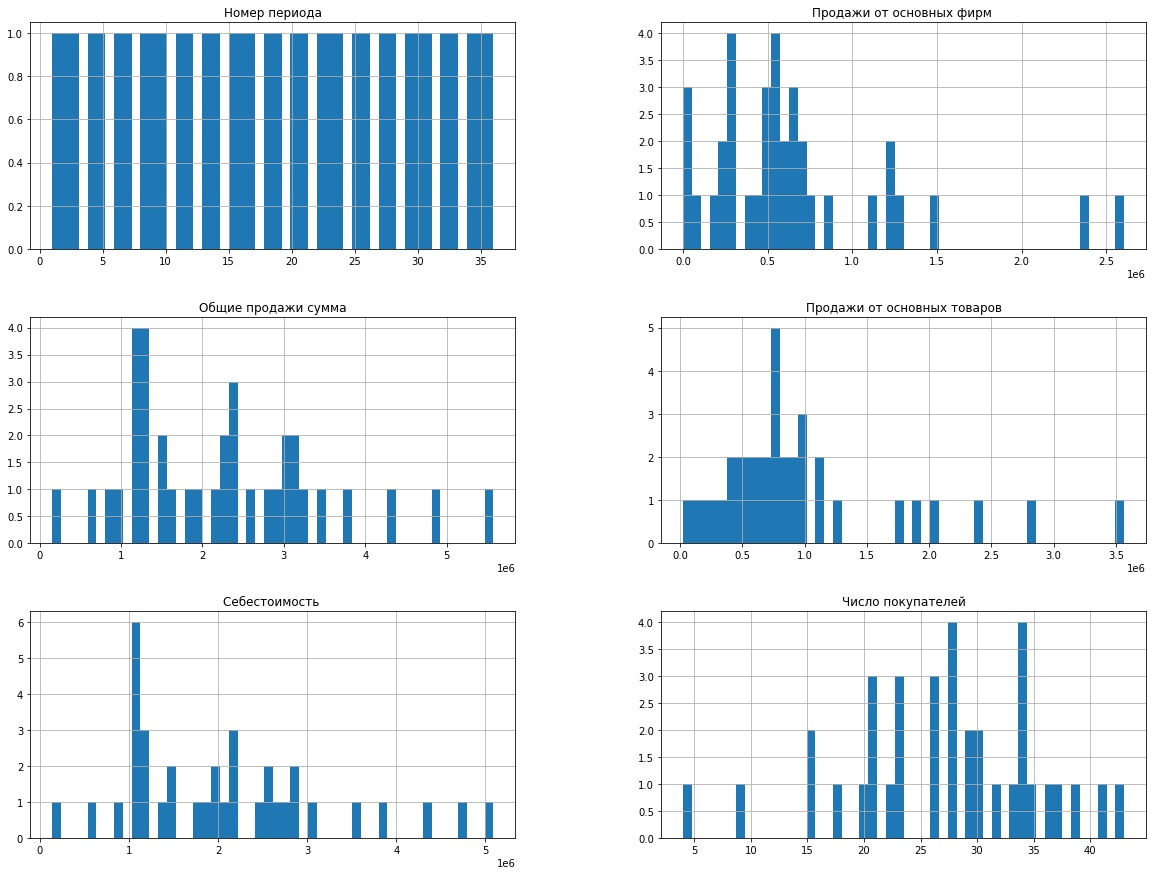

In [5]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
None 

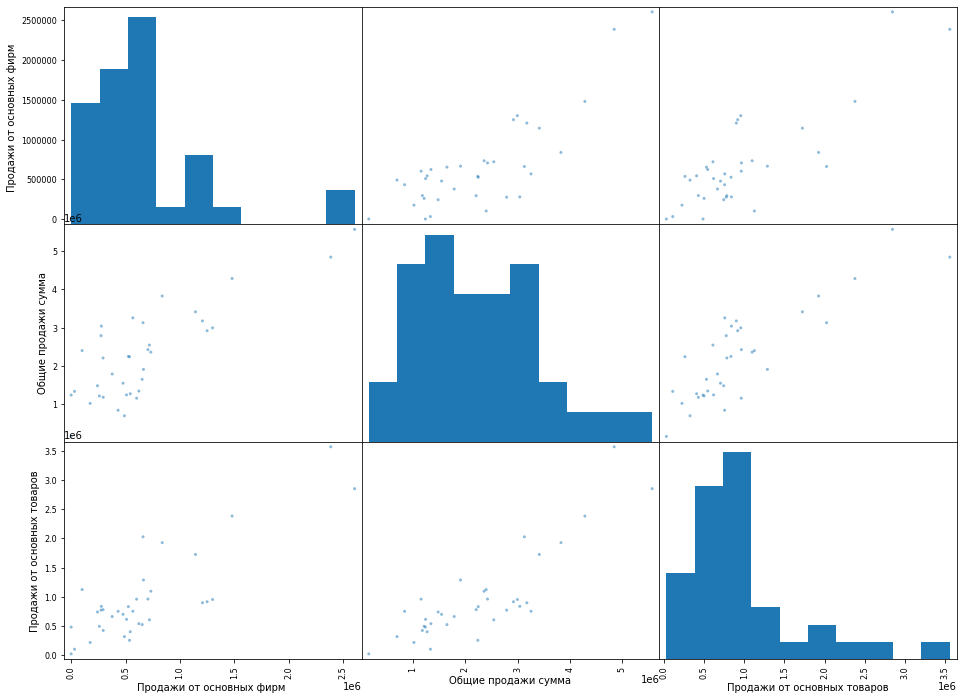

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.iloc[:,1:4], figsize=(16, 12))
None 

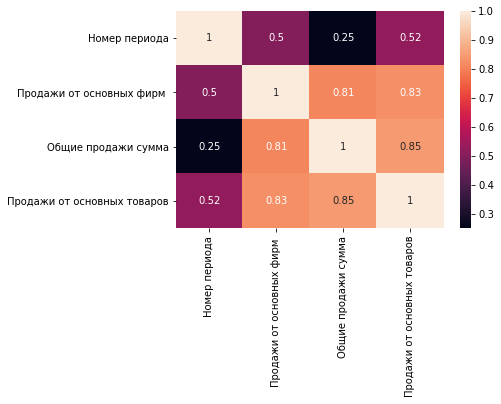

In [7]:
sns.heatmap(df.iloc[:,:4].corr(),
                 cbar=True,
                 annot=True)
None

Как мы видим по  верхней характеристики коэффициента Пирсона выходящее значение выручка  в значительной степени зависит от всех параметров.

## Регрессионный анализ   
### Множественная - регрессия 

In [8]:
X = df.drop(['Общие продажи cумма', 'Число покупателей'], axis=1)
y = df['Общие продажи cумма']

In [9]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)

y_pred = np.around(slr.predict(X),decimals = 2)

In [10]:
print(f'Получаем уравнение регрессии: \nY = {np.around(slr.coef_[0],decimals = 3)}*x1 + {np.around(slr.coef_[1],decimals = 3)} * x2 + {np.around(slr.coef_[2],decimals = 3)} * x3 + {np.around(slr.intercept_,decimals = 3)}')

Получаем уравнение регрессии: 
Y = -24915.748*x1 + 0.646 * x2 + 0.008 * x3 + 579773.259


In [25]:
y_preds = pd.DataFrame(index=np.arange(1,37))
y_preds['Linear'] = y_pred
y.index = pd.RangeIndex(start=1, stop=37, step=1)
y_preds['y'] = y
y_preds

,Linear,y
1,666773.72,155326.30
2,1396158.15,1237184.99
3,1438870.53,1333837.00
4,2231498.69,2400539.43
5,2602162.33,2791297.32
6,2745739.49,3042478.45
7,3056016.05,3257320.87
8,2564022.02,2545726.44
9,2090817.40,1481333.90
10,1655297.96,2240679.10


In [26]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_pred)

224387.92944444442

Скорей всего данная модель не оптимальна. Стоит попробовать другие модели или выполнить настройку гиперпараметров. 
Ошибка МАЕ для линейной модели составила 224387.93